## **IMPORTING THE LIBRARIES**

In [ ]:
!pip install opencv-python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from PIL import Image
import os
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.optimizers import Adam


In [ ]:
tf.test.is_gpu_available( cuda_only=False, min_cuda_compute_capability=None )

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

## **LOADING AND VISUALIZING THE DATASET**

In [ ]:
# For google colab

In [ ]:
# os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"username","key":"api-key"}

# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
    # json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/daniildeltsov/traffic-signs-gtsrb-plus-162-custom-classes",force=True)

100%|█████████████████████████████████████████████████████████████████████████████| 15.2G/15.2G [33:23<00:00, 8.12MB/s]


Collecting the training data

In [ ]:
data = []
labels = []

for i in range(205):
    path = 'traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((64, 64))
            data.append(np.array(resize_image))
            labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(97426, 64, 64, 3) (97426,)


We'll begin by visualizing a subset of the training set

- In the cell below, the code randomly selects 49 rows from data
- The label for each image is displayed above the image

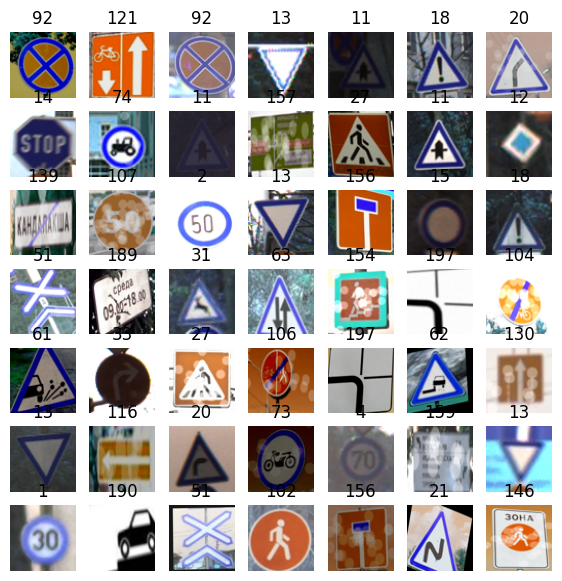

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ((39209, 30, 30, 3))
m,n,s,t = data.shape

fig,axes = plt.subplots(7,7,figsize=(7,7))

for i,ax in enumerate(axes.flat):
   # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices 

    data_random_reshaped = data[random_index]
    
    # Display the image
    ax.imshow(data_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(labels[random_index])
    ax.set_axis_off()

In [ ]:
# data_dir = 'traffic-signs-gtsrb-plus-162-custom-classes/Data_images'
# train_path = 'traffic-signs-gtsrb-plus-162-custom-classes/Data_images/Train'
# test_path = 'traffic-signs-gtsrb-plus-162-custom-classes/Data_images/Test'

Shuffling the training data

In [ ]:
shuffle_indexes = np.arange(data.shape[0])
np.random.shuffle(shuffle_indexes)
data = data[shuffle_indexes]
labels = labels[shuffle_indexes]

Splitting the data into train and validation set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (68198, 64, 64, 3)
X_valid.shape (29228, 64, 64, 3)
y_train.shape (68198,)
y_valid.shape (29228,)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 205)
y_val = tf.keras.utils.to_categorical(y_val, 205)

print(y_train.shape)
print(y_val.shape)

(68198, 205)
(29228, 205)


Data Augmentation

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [ ]:
Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Same as the 
    patience = 6, # Wait for 5 epochs before stopping the training
    verbose=1,
    restore_best_weights='True', # Restore model weights from the epoch with the best value of the monitored quantity.
    min_delta=0.1
)

In [ ]:
augmented_data = aug.flow(X_train, y_train)

In [ ]:
import inspect
model_dictionary = {m[0]:m[1] for m in inspect.getmembers(tf.keras.applications, inspect.isfunction)}
print(model_dictionary)

{'ConvNeXtBase': <function ConvNeXtBase at 0x0000024DA659E280>, 'ConvNeXtLarge': <function ConvNeXtLarge at 0x0000024DA659E310>, 'ConvNeXtSmall': <function ConvNeXtSmall at 0x0000024DA659E1F0>, 'ConvNeXtTiny': <function ConvNeXtTiny at 0x0000024DA659E160>, 'ConvNeXtXLarge': <function ConvNeXtXLarge at 0x0000024DA659E3A0>, 'DenseNet121': <function DenseNet121 at 0x0000024DA659E8B0>, 'DenseNet169': <function DenseNet169 at 0x0000024DA659E940>, 'DenseNet201': <function DenseNet201 at 0x0000024DA659E9D0>, 'EfficientNetB0': <function EfficientNetB0 at 0x0000024DA659ED30>, 'EfficientNetB1': <function EfficientNetB1 at 0x0000024DA659EDC0>, 'EfficientNetB2': <function EfficientNetB2 at 0x0000024DA659EE50>, 'EfficientNetB3': <function EfficientNetB3 at 0x0000024DA659EEE0>, 'EfficientNetB4': <function EfficientNetB4 at 0x0000024DA659EF70>, 'EfficientNetB5': <function EfficientNetB5 at 0x0000024DA65A9040>, 'EfficientNetB6': <function EfficientNetB6 at 0x0000024DA65A90D0>, 'EfficientNetB7': <funct

# **TRANSFER LEARNING USING RESNET 50**

In [ ]:
# RESNET 50 model
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
# Loading ResNet50 model
resnet_model = ResNet50(weights="imagenet", include_top = False, input_shape= (64,64,3))

# Freezing all layers except the last blockof ResNet50
# for layer in base_model.layers[:143]:
    #layer.trainable = False
resnet_model.trainable = True


In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [ ]:
for i,layer in enumerate(resnet_model.layers):
    print(i,layer.name,"-",layer.trainable)

0 input_1 - True
1 conv1_pad - True
2 conv1_conv - True
3 conv1_bn - True
4 conv1_relu - True
5 pool1_pad - True
6 pool1_pool - True
7 conv2_block1_1_conv - True
8 conv2_block1_1_bn - True
9 conv2_block1_1_relu - True
10 conv2_block1_2_conv - True
11 conv2_block1_2_bn - True
12 conv2_block1_2_relu - True
13 conv2_block1_0_conv - True
14 conv2_block1_3_conv - True
15 conv2_block1_0_bn - True
16 conv2_block1_3_bn - True
17 conv2_block1_add - True
18 conv2_block1_out - True
19 conv2_block2_1_conv - True
20 conv2_block2_1_bn - True
21 conv2_block2_1_relu - True
22 conv2_block2_2_conv - True
23 conv2_block2_2_bn - True
24 conv2_block2_2_relu - True
25 conv2_block2_3_conv - True
26 conv2_block2_3_bn - True
27 conv2_block2_add - True
28 conv2_block2_out - True
29 conv2_block3_1_conv - True
30 conv2_block3_1_bn - True
31 conv2_block3_1_relu - True
32 conv2_block3_2_conv - True
33 conv2_block3_2_bn - True
34 conv2_block3_2_relu - True
35 conv2_block3_3_conv - True
36 conv2_block3_3_bn - True
37

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [ ]:
Model = Sequential([
    
    resnet_model,
    tf.keras.layers.Flatten(),
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    
    Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),bias_regularizer=regularizers.l1(0.006) ,activation='relu'),
    Dropout(rate=.4, seed=123),
    
    Dense(units = 205, activation = 'softmax')
])

Model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 205)               52685     
                                                      

In [ ]:
history = Model.fit(augmented_data, epochs = 16, validation_data=(X_val, y_val),callbacks= [Early_Stopping])

Epoch 1/16
2132/2132 [==============================] - 159s 72ms/step - loss: 1.4297 - accuracy: 0.9515 - val_loss: 0.8866 - val_accuracy: 0.9837
Epoch 2/16
2132/2132 [==============================] - 136s 64ms/step - loss: 0.8708 - accuracy: 0.9761 - val_loss: 0.7666 - val_accuracy: 0.9819
Epoch 3/16
2132/2132 [==============================] - 136s 64ms/step - loss: 0.7675 - accuracy: 0.9764 - val_loss: 0.7006 - val_accuracy: 0.9809
Epoch 4/16
2132/2132 [==============================] - 136s 64ms/step - loss: 0.6783 - accuracy: 0.9783 - val_loss: 0.6316 - val_accuracy: 0.9868
Epoch 5/16
2132/2132 [==============================] - 136s 64ms/step - loss: 0.6309 - accuracy: 0.9792 - val_loss: 0.9610 - val_accuracy: 0.9232
Epoch 6/16
2132/2132 [==============================] - 136s 64ms/step - loss: 0.5682 - accuracy: 0.9798 - val_loss: 0.6110 - val_accuracy: 0.9740
Epoch 7/16
2132/2132 [==============================] - 136s 64ms/step - loss: 0.5188 - accuracy: 0.9827 - val_loss: 0

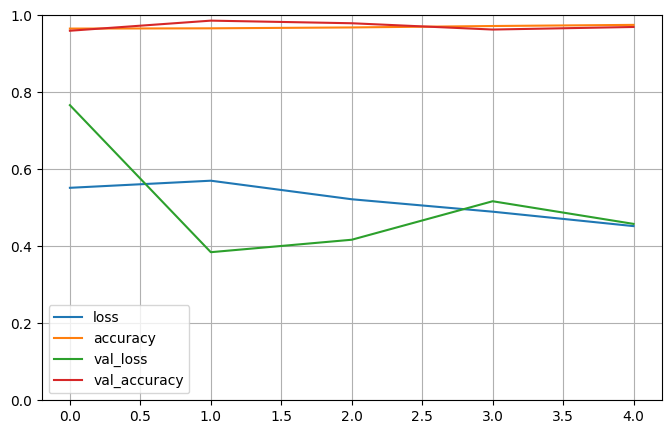

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

RESNET-50 TESTING

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
test = pd.read_csv('traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/Test_data.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread('traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((64,64))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)

In [ ]:
X_test = X_test/255

In [ ]:
X_test.shape

(53454, 64, 64, 3)

In [ ]:
res_pred = np.argmax(Model.predict(X_test[0:25000]), axis=-1)
lab = labels[0:25000]
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(lab, res_pred)*100)

782/782 [==============================] - 11s 14ms/step
Test Data accuracy:  91.432


In [ ]:
print(classification_report(res_pred,lab))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      0.98      0.99       335
           2       0.99      1.00      0.99       340
           3       1.00      0.82      0.90       241
           4       0.97      1.00      0.98       293
           5       0.92      0.97      0.94       280
           6       0.92      1.00      0.96        61
           7       1.00      0.87      0.93       263
           8       0.88      0.99      0.93       190
           9       1.00      1.00      1.00       233
          10       1.00      1.00      1.00       298
          11       1.00      0.98      0.99       217
          12       0.97      1.00      0.98       321
          13       0.99      1.00      1.00       359
          14       1.00      0.98      0.99       129
          15       1.00      0.99      1.00       104
          16       1.00      0.95      0.97        82
          17       1.00    

# **TRANSFER LEARNING USING VGG16**

In [ ]:
# VGG16 Model
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Loading VGG16 model
vgg_model = VGG16(weights="imagenet", include_top = False, input_shape= (64,64,3))
vgg_model.trainable = True

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
for i,layer in enumerate(vgg_model.layers):
    print(i,layer.name,"-",layer.trainable)

0 input_1 - True
1 block1_conv1 - True
2 block1_conv2 - True
3 block1_pool - True
4 block2_conv1 - True
5 block2_conv2 - True
6 block2_pool - True
7 block3_conv1 - True
8 block3_conv2 - True
9 block3_conv3 - True
10 block3_pool - True
11 block4_conv1 - True
12 block4_conv2 - True
13 block4_conv3 - True
14 block4_pool - True
15 block5_conv1 - True
16 block5_conv2 - True
17 block5_conv3 - True
18 block5_pool - True


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [ ]:
V_Model = Sequential([
    
    vgg_model,
    tf.keras.layers.Flatten(),
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    
    Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),bias_regularizer=regularizers.l1(0.006) ,activation='relu'),
    Dropout(rate=.4, seed=123),
    
    Dense(units = 205, activation = 'softmax')
])

V_Model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
V_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 205)               52685     
                                                        

In [ ]:
V_history = V_Model.fit(augmented_data, epochs = 20, validation_data=(X_val, y_val),callbacks= [Early_Stopping])

Epoch 1/20
2132/2132 [==============================] - 130s 61ms/step - loss: 0.6826 - accuracy: 0.9243 - val_loss: 0.5322 - val_accuracy: 0.9638
Epoch 2/20
2132/2132 [==============================] - 128s 60ms/step - loss: 0.6102 - accuracy: 0.9392 - val_loss: 22.1461 - val_accuracy: 0.9620
Epoch 3/20
2132/2132 [==============================] - 129s 60ms/step - loss: 0.5835 - accuracy: 0.9421 - val_loss: 113.9867 - val_accuracy: 0.9668
Epoch 4/20
2132/2132 [==============================] - 129s 61ms/step - loss: 0.5209 - accuracy: 0.9520 - val_loss: 1.8853 - val_accuracy: 0.9728
Epoch 5/20
2132/2132 [==============================] - 129s 60ms/step - loss: 0.5024 - accuracy: 0.9538 - val_loss: 158165.7188 - val_accuracy: 0.9684
Epoch 6/20
2132/2132 [==============================] - 129s 60ms/step - loss: 0.4594 - accuracy: 0.9624 - val_loss: 58.3217 - val_accuracy: 0.9856
Epoch 6: early stopping


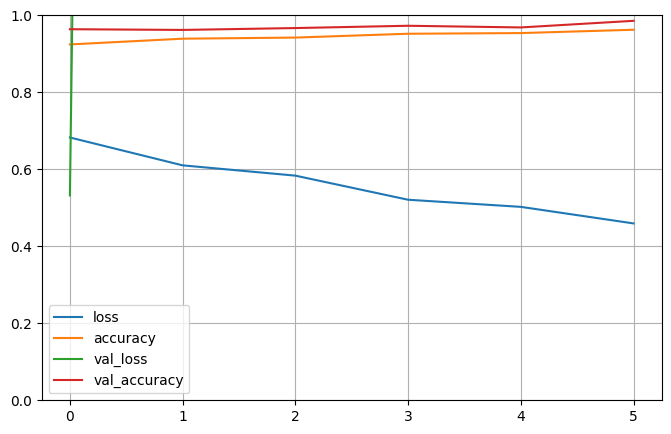

In [ ]:
pd.DataFrame(V_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

VGG16 TESTING

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
test = pd.read_csv('traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/Test_data.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread('traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((64,64))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)

In [ ]:
X_test = X_test/255

In [ ]:
vgg_pred = np.argmax(V_Model.predict(X_test[0:25000]), axis=-1)
lv = labels[0:25000]
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(lv, vgg_pred)*100)

782/782 [==============================] - 15s 16ms/step
Test Data accuracy:  86.396


In [ ]:
print(classification_report(vgg_pred,lv))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        35
           1       0.99      1.00      1.00       328
           2       0.99      0.99      0.99       342
           3       0.96      0.98      0.97       193
           4       0.99      1.00      0.99       298
           5       0.97      0.92      0.94       310
           6       0.92      0.95      0.94        64
           7       0.99      0.99      0.99       230
           8       0.91      0.98      0.94       201
           9       0.96      0.99      0.97       226
          10       1.00      0.98      0.99       304
          11       0.95      0.95      0.95       212
          12       0.96      0.98      0.97       322
          13       0.99      0.99      0.99       363
          14       0.98      0.98      0.98       128
          15       0.99      0.94      0.97       108
          16       1.00      0.71      0.83       110
          17       1.00    

# **TRANSFER LEARNING USING REGNET**

In [ ]:
from tensorflow.keras.applications import RegNetX002

In [ ]:
# Loading REGNET model
rn_model = RegNetX002(weights="imagenet", include_top = False, input_shape= (64,64,3))
rn_model.trainable = True

In [ ]:
rn_model.summary()

Model: "regnetx002"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 regnetx002_prestem_rescaling (  (None, 64, 64, 3)   0           ['input_1[0][0]']                
 Rescaling)                                                                                       
                                                                                                  
 regnetx002_stem_conv (Conv2D)  (None, 32, 32, 32)   864         ['regnetx002_prestem_rescaling[0]
                                                                 [0]']                            
                                                                                         

 n)                                                                                               
                                                                                                  
 regnetx002_Stage_1_XBlock_0_sk  (None, 8, 8, 56)    224         ['regnetx002_Stage_1_XBlock_0_ski
 ip_bn (BatchNormalization)                                      p_1x1[0][0]']                    
                                                                                                  
 tf.__operators__.add_1 (TFOpLa  (None, 8, 8, 56)    0           ['regnetx002_Stage_1_XBlock_0_con
 mbda)                                                           v_1x1_2_bn[0][0]',               
                                                                  'regnetx002_Stage_1_XBlock_0_ski
                                                                 p_bn[0][0]']                     
                                                                                                  
 regnetx00

                                                                                                  
 regnetx002_Stage_2_XBlock_1_ex  (None, 4, 4, 152)   0           ['tf.__operators__.add_3[0][0]'] 
 it_relu (ReLU)                                                                                   
                                                                                                  
 regnetx002_Stage_2_XBlock_2_co  (None, 4, 4, 152)   23104       ['regnetx002_Stage_2_XBlock_1_exi
 nv_1x1_1 (Conv2D)                                               t_relu[0][0]']                   
                                                                                                  
 regnetx002_Stage_2_XBlock_2_co  (None, 4, 4, 152)   608         ['regnetx002_Stage_2_XBlock_2_con
 nv_1x1_1_bn (BatchNormalizatio                                  v_1x1_1[0][0]']                  
 n)                                                                                               
          

 nv_3x3 (Conv2D)                                                 v_1x1_1_relu[0][0]']             
                                                                                                  
 regnetx002_Stage_3_XBlock_0_co  (None, 2, 2, 368)   1472        ['regnetx002_Stage_3_XBlock_0_con
 nv_3x3_bn (BatchNormalization)                                  v_3x3[0][0]']                    
                                                                                                  
 regnetx002_Stage_3_XBlock_0_co  (None, 2, 2, 368)   0           ['regnetx002_Stage_3_XBlock_0_con
 nv_3x3_relu (ReLU)                                              v_3x3_bn[0][0]']                 
                                                                                                  
 regnetx002_Stage_3_XBlock_0_co  (None, 2, 2, 368)   135424      ['regnetx002_Stage_3_XBlock_0_con
 nv_1x1_2 (Conv2D)                                               v_3x3_relu[0][0]']               
          

 nv_1x1_2 (Conv2D)                                               v_3x3_relu[0][0]']               
                                                                                                  
 regnetx002_Stage_3_XBlock_2_co  (None, 2, 2, 368)   1472        ['regnetx002_Stage_3_XBlock_2_con
 nv_1x1_2_bn (BatchNormalizatio                                  v_1x1_2[0][0]']                  
 n)                                                                                               
                                                                                                  
 tf.__operators__.add_8 (TFOpLa  (None, 2, 2, 368)   0           ['regnetx002_Stage_3_XBlock_2_con
 mbda)                                                           v_1x1_2_bn[0][0]',               
                                                                  'regnetx002_Stage_3_XBlock_1_exi
                                                                 t_relu[0][0]']                   
          

 nv_1x1_1 (Conv2D)                                               t_relu[0][0]']                   
                                                                                                  
 regnetx002_Stage_3_XBlock_5_co  (None, 2, 2, 368)   1472        ['regnetx002_Stage_3_XBlock_5_con
 nv_1x1_1_bn (BatchNormalizatio                                  v_1x1_1[0][0]']                  
 n)                                                                                               
                                                                                                  
 regnetx002_Stage_3_XBlock_5_co  (None, 2, 2, 368)   0           ['regnetx002_Stage_3_XBlock_5_con
 nv_1x1_1_relu (ReLU)                                            v_1x1_1_bn[0][0]']               
                                                                                                  
 regnetx002_Stage_3_XBlock_5_co  (None, 2, 2, 368)   26496       ['regnetx002_Stage_3_XBlock_5_con
 nv_3x3 (C

In [ ]:
for i,layer in enumerate(rn_model.layers):
    print(i,layer.name,"-",layer.trainable)

0 input_1 - True
1 regnetx002_prestem_rescaling - True
2 regnetx002_stem_conv - True
3 regnetx002_stem_bn - True
4 regnetx002_stem_relu - True
5 regnetx002_Stage_0_XBlock_0_conv_1x1_1 - True
6 regnetx002_Stage_0_XBlock_0_conv_1x1_1_bn - True
7 regnetx002_Stage_0_XBlock_0_conv_1x1_1_relu - True
8 regnetx002_Stage_0_XBlock_0_conv_3x3 - True
9 regnetx002_Stage_0_XBlock_0_conv_3x3_bn - True
10 regnetx002_Stage_0_XBlock_0_conv_3x3_relu - True
11 regnetx002_Stage_0_XBlock_0_conv_1x1_2 - True
12 regnetx002_Stage_0_XBlock_0_skip_1x1 - True
13 regnetx002_Stage_0_XBlock_0_conv_1x1_2_bn - True
14 regnetx002_Stage_0_XBlock_0_skip_bn - True
15 tf.__operators__.add - True
16 regnetx002_Stage_0_XBlock_0_exit_relu - True
17 regnetx002_Stage_1_XBlock_0_conv_1x1_1 - True
18 regnetx002_Stage_1_XBlock_0_conv_1x1_1_bn - True
19 regnetx002_Stage_1_XBlock_0_conv_1x1_1_relu - True
20 regnetx002_Stage_1_XBlock_0_conv_3x3 - True
21 regnetx002_Stage_1_XBlock_0_conv_3x3_bn - True
22 regnetx002_Stage_1_XBlock_0_co

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [ ]:
RN_model = Sequential([
    
    rn_model,
    tf.keras.layers.Flatten(),
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    
    Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),bias_regularizer=regularizers.l1(0.006) ,activation='relu'),
    Dropout(rate=.4, seed=123),
    
    Dense(units = 205, activation = 'softmax')
])

RN_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
RN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 regnetx002 (Functional)     (None, 2, 2, 368)         2336640   
                                                                 
 flatten (Flatten)           (None, 1472)              0         
                                                                 
 batch_normalization (BatchN  (None, 1472)             5888      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               377088    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 205)               52685     
                                                        

In [ ]:
RN_history = RN_model.fit(augmented_data, epochs = 30, validation_data =(X_val,y_val) ,callbacks= [Early_Stopping])

Epoch 1/30
2132/2132 [==============================] - 103s 42ms/step - loss: 3.2311 - accuracy: 0.5429 - val_loss: 1.6996 - val_accuracy: 0.7604
Epoch 2/30
2132/2132 [==============================] - 69s 33ms/step - loss: 1.7170 - accuracy: 0.7581 - val_loss: 1.1531 - val_accuracy: 0.8911
Epoch 3/30
2132/2132 [==============================] - 69s 32ms/step - loss: 1.3985 - accuracy: 0.8292 - val_loss: 1.0311 - val_accuracy: 0.9171
Epoch 4/30
2132/2132 [==============================] - 68s 32ms/step - loss: 1.2299 - accuracy: 0.8651 - val_loss: 0.9828 - val_accuracy: 0.9255
Epoch 5/30
2132/2132 [==============================] - 71s 33ms/step - loss: 1.0749 - accuracy: 0.8896 - val_loss: 0.7703 - val_accuracy: 0.9577
Epoch 6/30
2132/2132 [==============================] - 69s 32ms/step - loss: 0.9444 - accuracy: 0.9079 - val_loss: 0.7053 - val_accuracy: 0.9589
Epoch 7/30
2132/2132 [==============================] - 69s 32ms/step - loss: 0.8354 - accuracy: 0.9197 - val_loss: 0.6295 

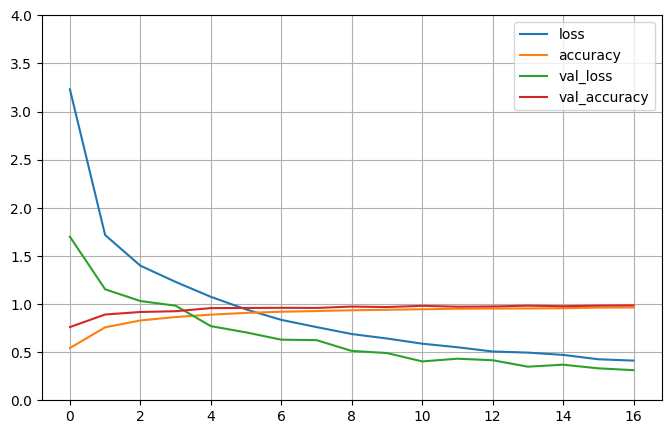

In [ ]:
pd.DataFrame(RN_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 4)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
test = pd.read_csv('traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/Test_data.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread('traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((64,64))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)

In [ ]:
X_test = X_test/255

In [ ]:
RN_pred = np.argmax(RN_model.predict(X_test[0:25000]), axis=-1)
le = labels[0:25000]
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(le, EN_pred)*100)

782/782 [==============================] - 7s 9ms/step
Test Data accuracy:  92.756


In [ ]:
print(classification_report(RN_pred,le))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.93      0.99      0.96       308
           2       0.99      0.87      0.93       388
           3       0.92      0.95      0.94       190
           4       0.99      0.93      0.96       319
           5       0.88      0.91      0.89       284
           6       0.98      0.98      0.98        66
           7       0.90      0.97      0.93       214
           8       0.90      0.86      0.88       227
           9       1.00      0.95      0.97       244
          10       1.00      0.99      0.99       298
          11       0.85      0.96      0.90       188
          12       0.92      0.99      0.95       310
          13       1.00      0.98      0.99       366
          14       1.00      0.99      1.00       128
          15       0.99      0.99      0.99       103
          16       1.00      1.00      1.00        78
          17       0.95    

# **TRANSFER LEARNING USING DenseNet121**

In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
dn_model = DenseNet121(weights="imagenet", include_top = False, input_shape= (64,64,3))
dn_model.trainable = True

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
dn_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

 conv2_block4_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 16, 16, 192)  0          ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
          

                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_concat (Concatena  (None, 8, 8, 192)   0           ['conv3_block1_concat[0][0]',    
 te)      

 conv3_block6_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 8, 8, 320)   0           ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 8, 8, 320)   1280        ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 8, 8, 320)   0           ['conv3_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 8, 8, 448)   0           ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 8, 8, 128)    57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 8, 8, 128)   0           ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 4, 4, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 4, 4, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 4, 4, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 4, 4, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 4, 4, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 4, 4, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 4, 4, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 4, 4, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 4, 4, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 4, 4, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 4, 4, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 4, 4, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 4, 4, 1024)   4096        ['conv4_block24_concat[0][0]']   
                                                                                                  
 pool4_relu (Activation)        (None, 4, 4, 1024)   0           ['pool4_bn[0][0]']               
                                                                                                  
 pool4_conv (Conv2D)            (None, 4, 4, 512)    524288      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_pool (AveragePooling2D)  (None, 2, 2, 512)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_blo

 conv5_block4_concat (Concatena  (None, 2, 2, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 2, 2, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 2, 2, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 2, 2, 128)    81920       ['conv5_block5_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 2, 2, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 2, 2, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

 conv5_block13_1_relu (Activati  (None, 2, 2, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 2, 2, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_block14_0_bn (BatchNorma  (None, 2, 2, 928)   3712        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
          

In [ ]:
for i,layer in enumerate(dn_model.layers):
    print(i,layer.name,"-",layer.trainable)

0 input_1 - True
1 zero_padding2d - True
2 conv1/conv - True
3 conv1/bn - True
4 conv1/relu - True
5 zero_padding2d_1 - True
6 pool1 - True
7 conv2_block1_0_bn - True
8 conv2_block1_0_relu - True
9 conv2_block1_1_conv - True
10 conv2_block1_1_bn - True
11 conv2_block1_1_relu - True
12 conv2_block1_2_conv - True
13 conv2_block1_concat - True
14 conv2_block2_0_bn - True
15 conv2_block2_0_relu - True
16 conv2_block2_1_conv - True
17 conv2_block2_1_bn - True
18 conv2_block2_1_relu - True
19 conv2_block2_2_conv - True
20 conv2_block2_concat - True
21 conv2_block3_0_bn - True
22 conv2_block3_0_relu - True
23 conv2_block3_1_conv - True
24 conv2_block3_1_bn - True
25 conv2_block3_1_relu - True
26 conv2_block3_2_conv - True
27 conv2_block3_concat - True
28 conv2_block4_0_bn - True
29 conv2_block4_0_relu - True
30 conv2_block4_1_conv - True
31 conv2_block4_1_bn - True
32 conv2_block4_1_relu - True
33 conv2_block4_2_conv - True
34 conv2_block4_concat - True
35 conv2_block5_0_bn - True
36 conv2_bl

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [ ]:
DN_model = Sequential([
    
    dn_model,
    tf.keras.layers.Flatten(),
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    
    Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),bias_regularizer=regularizers.l1(0.006) ,activation='relu'),
    Dropout(rate=.4, seed=123),
    
    Dense(units = 205, activation = 'softmax')
])

DN_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
DN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 batch_normalization (BatchN  (None, 4096)             16384     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               1048832   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 205)               52685     
                                                        

In [ ]:
DN_history = DN_model.fit(augmented_data, epochs = 30, validation_data =(X_val,y_val) ,callbacks= [Early_Stopping])

Epoch 1/30
2132/2132 [==============================] - 202s 87ms/step - loss: 2.7654 - accuracy: 0.6647 - val_loss: 1.4618 - val_accuracy: 0.8702
Epoch 2/30
2132/2132 [==============================] - 160s 75ms/step - loss: 1.3928 - accuracy: 0.8896 - val_loss: 1.2144 - val_accuracy: 0.9392
Epoch 3/30
2132/2132 [==============================] - 158s 74ms/step - loss: 1.2069 - accuracy: 0.9207 - val_loss: 1.0778 - val_accuracy: 0.9324
Epoch 4/30
2132/2132 [==============================] - 159s 75ms/step - loss: 1.0410 - accuracy: 0.9400 - val_loss: 0.9347 - val_accuracy: 0.9707
Epoch 5/30
2132/2132 [==============================] - 165s 77ms/step - loss: 0.8968 - accuracy: 0.9528 - val_loss: 0.7506 - val_accuracy: 0.9731
Epoch 6/30
2132/2132 [==============================] - 160s 75ms/step - loss: 0.8040 - accuracy: 0.9585 - val_loss: 0.7702 - val_accuracy: 0.9712
Epoch 7/30
2132/2132 [==============================] - 160s 75ms/step - loss: 0.6761 - accuracy: 0.9665 - val_loss: 0

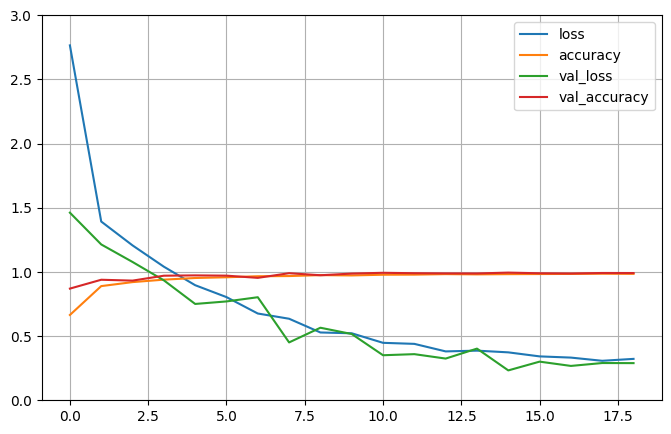

In [ ]:
pd.DataFrame(DN_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
test = pd.read_csv('traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/Test_data.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread('traffic-signs-gtsrb-plus-162-custom-classes/Data_images' + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((64,64))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)

In [ ]:
X_test = X_test/255

In [ ]:
DN_pred = np.argmax(DN_model.predict(X_test[0:25000]), axis=-1)
ld = labels[0:25000]
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(ld, DN_pred)*100)

782/782 [==============================] - 18s 20ms/step
Test Data accuracy:  95.104


In [ ]:
print(classification_report(DN_pred,ld))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.98      1.00      0.99       322
           2       1.00      0.97      0.98       355
           3       1.00      0.95      0.98       207
           4       0.99      0.99      0.99       301
           5       0.96      0.99      0.97       287
           6       0.95      0.98      0.97        64
           7       0.99      0.99      0.99       230
           8       1.00      0.99      0.99       217
           9       1.00      0.95      0.97       244
          10       1.00      1.00      1.00       297
          11       1.00      0.93      0.96       227
          12       0.97      0.99      0.98       323
          13       0.99      0.99      0.99       364
          14       1.00      1.00      1.00       127
          15       1.00      0.99      1.00       104
          16       0.99      1.00      0.99        77
          17       1.00    